In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
from gensim.models import KeyedVectors
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [18]:
datap = "/media/compute/vol/dsg/sinaza/zero_shot_reg/data/"
refdf_path = datap+"refcoco_refdf_heads.json.gz"
refdf = pd.read_json(refdf_path,compression='gzip', orient='split')
full_vocab = Counter(" ".join([ref for reflist in list(refdf.refexps) for ref in reflist]).split())
full_names = Counter(" ".join([ref for reflist in list(refdf.names) for ref in reflist]).split())
word_index = full_vocab.keys()
name_index = full_names.keys()

In [44]:
def get_rel_vocab_entropy(cat_id):
    nocatdf = refdf[refdf.cat != cat_id]
    nocat_vocab = Counter(" ".join([ref for reflist in list(nocatdf.refexps) for ref in reflist]).split())
    q_dist = np.array([full_vocab[x] for x in word_index])
    p_dist = np.array([nocat_vocab[x] for x in word_index])
    print "rel vocab entropy:",entropy(p_dist,q_dist)
    return True

def get_rel_name_entropy(cat_id):
    nocatdf = refdf[refdf.cat != cat_id]
    nocat_vocab = Counter(" ".join([ref for reflist in list(nocatdf.names) for ref in reflist]).split())
    q_dist = np.array([full_names[x] for x in word_index])
    p_dist = np.array([nocat_vocab[x] for x in word_index])
    print "rel name entropy:",entropy(p_dist,q_dist)
    
    catdf = refdf[refdf.cat == cat_id]
    cat_names = Counter(" ".join([ref for reflist in list(catdf.names) for ref in reflist]).split())
    print "cat-name entropy:", entropy(cat_names.values())
    print "n name types:", len(cat_names.keys())
    
    return True
    

In [39]:
get_rel_vocab_entropy(3)

rel vocab entropy: 0.0025357976801629644


True

In [40]:
get_rel_name_entropy(3)

rel name entropy: 0.004689579887343429
cat-name entropy: 1.8503471816214723


True

In [30]:
cat_lines = open("../../data/cats.txt").readlines()
id2cat = dict([(int(line.split(' , ')[0]),line.split(' , ')[1].strip()) for line in cat_lines])

In [31]:
id2cat

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [45]:
for cid in id2cat:
    print cid,id2cat[cid]
    get_rel_vocab_entropy(cid)
    get_rel_name_entropy(cid)
    print "*"
    

1 person
rel vocab entropy: 0.2435586029279006
rel name entropy: 0.8347215355641857
cat-name entropy: 2.8142369253456785
n name types: 482
*
2 bicycle
rel vocab entropy: 0.00025841450658665153
rel name entropy: 0.0018208473732792252
cat-name entropy: 1.4856288829078208
n name types: 32
*
3 car
rel vocab entropy: 0.0025357976801629644
rel name entropy: 0.004689579887343429
cat-name entropy: 1.8503471816214723
n name types: 76
*
4 motorcycle
rel vocab entropy: 0.0021604527786955353
rel name entropy: 0.01047943875122687
cat-name entropy: 1.873501521420339
n name types: 83
*
5 airplane
rel vocab entropy: 0.0010415845838569239
rel name entropy: 0.003705176211172247
cat-name entropy: 1.521107365115473
n name types: 34
*
6 bus
rel vocab entropy: 0.002857684742816534
rel name entropy: 0.004333020278375116
cat-name entropy: 1.3892370155453468
n name types: 55
*
7 train
rel vocab entropy: 0.0016577378389785818
rel name entropy: 0.0027466553636694984
cat-name entropy: 1.5592032431339575
n name ty

rel vocab entropy: 0.002217049061077372
rel name entropy: 0.007536109343821519
cat-name entropy: 2.121001413436775
n name types: 99
*
64 potted plant
rel vocab entropy: 0.0008284382657745828
rel name entropy: 0.0031923498191462575
cat-name entropy: 2.4128766126822794
n name types: 59
*
65 bed
rel vocab entropy: 0.0012317809638269527
rel name entropy: 0.003303774791029391
cat-name entropy: 2.0648924039811645
n name types: 63
*
67 dining table
rel vocab entropy: 0.0012882004565965505
rel name entropy: 0.004688452840663151
cat-name entropy: 2.7171336972828564
n name types: 122
*
70 toilet
rel vocab entropy: 0.0007525951709622907
rel name entropy: 0.002099148835914657
cat-name entropy: 1.3306344840620987
n name types: 35
*
72 tv
rel vocab entropy: 0.0012653481399885445
rel name entropy: 0.005684360923043524
cat-name entropy: 1.8822686835015483
n name types: 54
*
73 laptop
rel vocab entropy: 0.0007808356840165619
rel name entropy: 0.0028939111372758286
cat-name entropy: 1.9552134324247792
n

In [33]:
entropy([1])

0.0

In [34]:
entropy([0.8,0.2])

0.5004024235381879

In [35]:
entropy([0.5,0.5])

0.6931471805599453

In [37]:
entropy([0.25,0.25,0.25,0.25])

1.3862943611198906

In [46]:
catdf = refdf[refdf.cat == 32]
cat_names = Counter(" ".join([ref for reflist in list(catdf.names) for ref in reflist]).split())
print "n name types:", len(cat_names.keys())

n name types: 23


In [47]:
cat_names

Counter({u'baby': 1,
         u'bike': 1,
         u'blk': 1,
         u'bow': 3,
         u'chest': 1,
         u'cloth': 2,
         u'column': 1,
         u'dot': 2,
         u'dots': 1,
         u'fabric': 3,
         u'giraffe': 1,
         u'guy': 1,
         u'one': 2,
         u'plaid': 1,
         u'plain': 1,
         u'polka': 3,
         u'scarf': 1,
         u'strip': 1,
         u'stripe': 1,
         u'stripes': 1,
         u'thing': 1,
         u'tie': 59,
         u'way': 1})

In [48]:
catdf

,i_corpus,image_id,region_id,names,refexps,cat,ix_Xfile
919,1,571694,1442290,[tie],"[pink tie far right, far right tie, far right ...",32,19860
920,1,571694,298954,"[tie, fabric]","[left tie, red fabric left]",32,19859
921,1,571694,298741,"[tie, strip]","[red tie on right next to black headband, righ...",32,19858
922,1,571694,298437,"[tie, bow]","[big tie, big red bow thing in center]",32,19857
3905,1,537157,1841409,[tie],[tie with purple at left second row above pais...,32,48784
3906,1,537157,1841038,"[tie, cloth]","[upper right purple cloth, top right most tie ...",32,48783
3907,1,537157,1840254,"[tie, scarf]","[multicolored scarf with white dottythingies, ...",32,48782
3908,1,537157,2212608,[tie],[reddish tie in middle of pic above large pais...,32,48785
3909,1,537157,1442165,"[tie, cloth]","[aqua blue cloth, aqua tie with dots toward to...",32,48781
3910,1,537157,1439888,"[tie, dot]","[bottom red and blue dot cloth, bottom pasliy ...",32,48780


In [49]:
len(name_index)

778

In [51]:
name2catcount = {n:Counter() for n in name_index}


In [52]:
for ix, row in refdf.iterrows():
    for nr in row['names']:
        name2catcount[nr][row['cat']] += 1

In [61]:
nament = [(entropy(name2catcount[n].values()),n) for n in name2catcount]

In [66]:
name2entr = {n:entropy(name2catcount[n].values()) for n in name2catcount}

In [62]:
nament.sort()

In [64]:
nament[:100]

[(0.0, u'airplane'),
 (0.0, u'ambulance'),
 (0.0, u'apron'),
 (0.0, u'babe'),
 (0.0, u'baldy'),
 (0.0, u'baseball'),
 (0.0, u'baseman'),
 (0.0, u'batta'),
 (0.0, u'beanie'),
 (0.0, u'beans'),
 (0.0, u'bedspread'),
 (0.0, u'biker'),
 (0.0, u'bikini'),
 (0.0, u'blazer'),
 (0.0, u'blouse'),
 (0.0, u'boarder'),
 (0.0, u'boys'),
 (0.0, u'brunette'),
 (0.0, u'bull'),
 (0.0, u'buss'),
 (0.0, u'buy'),
 (0.0, u'canoe'),
 (0.0, u'canopy'),
 (0.0, u'catch'),
 (0.0, u'catcher'),
 (0.0, u'cather'),
 (0.0, u'cattle'),
 (0.0, u'cauliflower'),
 (0.0, u'char'),
 (0.0, u'chef'),
 (0.0, u'chubby'),
 (0.0, u'clown'),
 (0.0, u'control'),
 (0.0, u'cook'),
 (0.0, u'crackers'),
 (0.0, u'crib'),
 (0.0, u'cub'),
 (0.0, u'dad'),
 (0.0, u'decker'),
 (0.0, u'denim'),
 (0.0, u'dip'),
 (0.0, u'doggy'),
 (0.0, u'elefant'),
 (0.0, u'elephants'),
 (0.0, u'father'),
 (0.0, u'fedex'),
 (0.0, u'finger'),
 (0.0, u'fingers'),
 (0.0, u'firetruck'),
 (0.0, u'flamingo'),
 (0.0, u'floret'),
 (0.0, u'gif'),
 (0.0, u'giraffes'),


In [65]:
nament[-100:]

[(1.7328679513998633, u'bin'),
 (1.7328679513998633, u'sliver'),
 (1.7478680974667573, u'art'),
 (1.7478680974667573, u'creature'),
 (1.7480673485460891, u'line'),
 (1.7623147108366672, u'egg'),
 (1.7670091910745693, u'fabric'),
 (1.7751250090009736, u'blob'),
 (1.7885037935568002, u'plain'),
 (1.7917594692280547, u'rack'),
 (1.791759469228055, u'cream'),
 (1.8090102842668667, u'machine'),
 (1.8091581844412503, u'roll'),
 (1.8143075196071252, u'foremost'),
 (1.8143075196071252, u'ground'),
 (1.8200759753606213, u'handle'),
 (1.8343719702816235, u'grill'),
 (1.8343719702816237, u'heart'),
 (1.8390211812571495, u'extreme'),
 (1.8429895252201116, u'set'),
 (1.859139887178967, u'wood'),
 (1.8711604142318066, u'mtf'),
 (1.8711604142318066, u'pieces'),
 (1.8797305152652761, u'mama'),
 (1.8903627753388679, u'column'),
 (1.9061547465398496, u'fron'),
 (1.9061547465398496, u'lone'),
 (1.9061547465398496, u'panel'),
 (1.9061547465398496, u'wow'),
 (1.9068530185892727, u'orange'),
 (1.90803683450

(array([303., 142., 107.,  74.,  75.,  37.,  28.,   8.,   3.,   1.]),
 array([0.        , 0.37494404, 0.74988808, 1.12483212, 1.49977616,
        1.8747202 , 2.24966424, 2.62460828, 2.99955232, 3.37449636,
        3.7494404 ]),
 <a list of 10 Patch objects>)

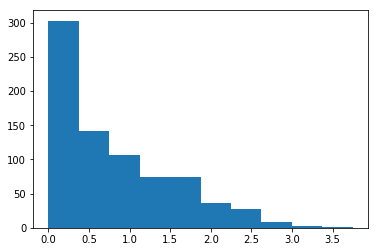

In [67]:
plt.hist(name2entr.values())